# PROJECT 2

The aim is to predict the price of a house at sale based on the Ames Housing Dataset.

In [1]:
#importing all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
train_csv = "C:/Users/Shruthi/Desktop/classes-students/projects1234/project_2/datasets/train.csv"
train = pd.read_csv(train_csv)

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


For feature selection of all the numerical categories I am going to see which categories affect the sales price of the house by checking the co-relation matrix

In [4]:

train.corr()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,...,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
PID,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,...,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
MS SubClass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,...,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
Lot Frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,...,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
Lot Area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,...,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
Overall Qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,...,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
Overall Cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,...,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
Year Built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,...,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
Year Remod/Add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,...,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
Mas Vnr Area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,...,0.163584,0.163489,-0.107104,0.011161,0.086631,0.012422,0.079219,-0.001472,-0.018719,0.512230


I have picked all the columns that have a co-relation factor of more than 0.5 , with the sales-price. 
THESE COLUMNS GO INTO MY FEATURE MATRIX

In [5]:

df = train[["Overall Qual", "Total Bsmt SF","1st Flr SF","Gr Liv Area", "Garage Cars", "Garage Area", "Garage Yr Blt","TotRms AbvGrd","Full Bath" , "Mas Vnr Area", "Year Remod/Add" ,"Year Built","SalePrice",'2nd Flr SF','Bsmt Unf SF',"MS Zoning","Street","Kitchen Qual", "Exter Qual"]]

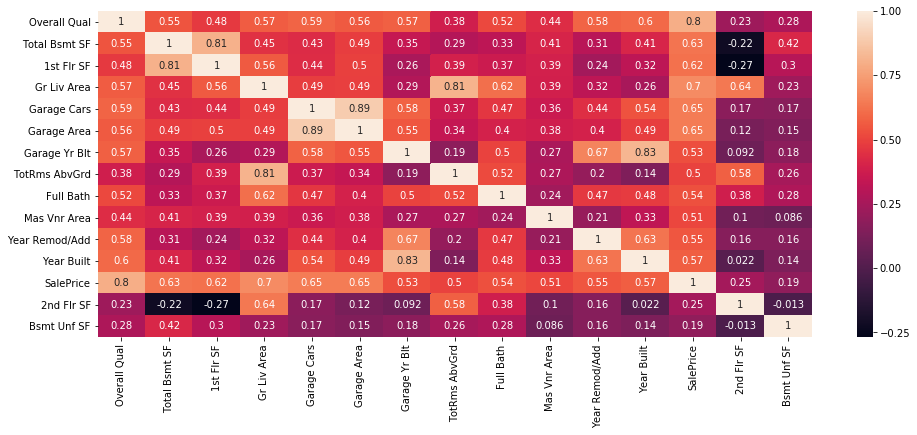

In [6]:
#this is the co-relation matrix of my current feature matrix
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(),annot=True)

In [7]:
#checking how many total null values in the dataset
df.isnull().sum()

Overall Qual        0
Total Bsmt SF       1
1st Flr SF          0
Gr Liv Area         0
Garage Cars         1
Garage Area         1
Garage Yr Blt     114
TotRms AbvGrd       0
Full Bath           0
Mas Vnr Area       22
Year Remod/Add      0
Year Built          0
SalePrice           0
2nd Flr SF          0
Bsmt Unf SF         1
MS Zoning           0
Street              0
Kitchen Qual        0
Exter Qual          0
dtype: int64

To clean up my data I am going to remove my outliers and fill out the null values by drawing boxplots for each of the columns in my feature matrix

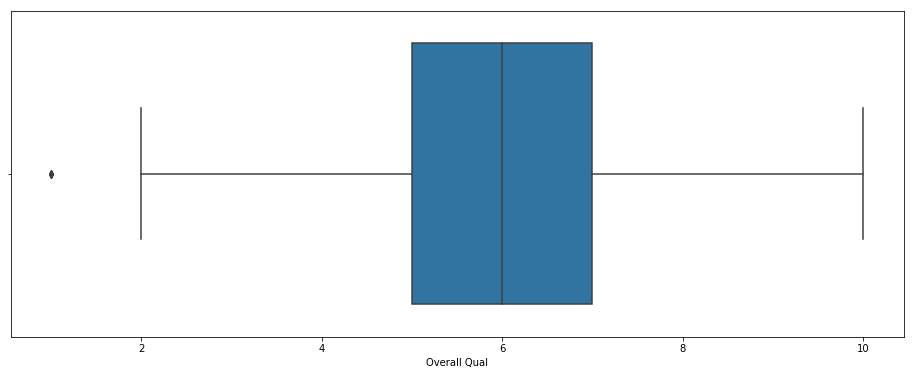

In [8]:
#this boxplot is for the first feature overall quality
plt.figure(figsize=(16, 6))
sns.boxplot(x=df["Overall Qual"])

In [9]:
#any house lower than an overall quality of 2 is not eligible for sale
df = df[df["Overall Qual"]>=2]

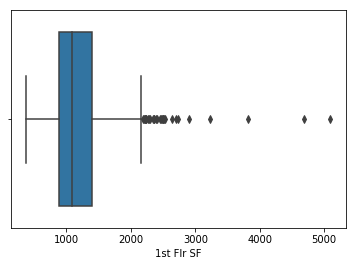

In [10]:
sns.boxplot(x=df["1st Flr SF"])

In [11]:
#houses with a 1st floor square feet of more than 3000 are assumed to be wrongly entered into the database
df = df[df["1st Flr SF"]<= 3000]

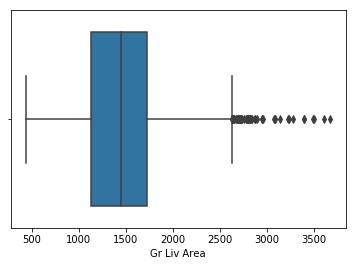

In [12]:
sns.boxplot(x=df["Gr Liv Area"])

In [13]:
#a cluster of values still are within 3500 so they are still considered within the acceptable range
df = df[df["Gr Liv Area"]<= 3500]

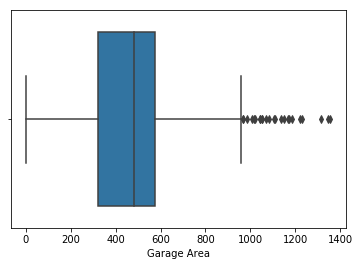

In [14]:
sns.boxplot(x=df["Garage Area"])


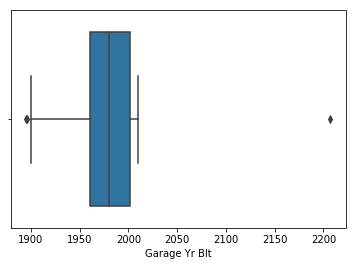

In [15]:
sns.boxplot(x=df["Garage Yr Blt"])

In [16]:
#one value has been wrong entered as the year 2200 so is removed

df = df[df["Garage Yr Blt"]<= 2019]

In [17]:
df['Garage Yr Blt'].fillna(df['Year Built'], inplace=True)
#the null value in the garage built year is being filled with the same year the house was built.

In [18]:
df["Garage Yr Blt"].head() 

0    1976.0
1    1997.0
2    1953.0
3    2007.0
4    1957.0
Name: Garage Yr Blt, dtype: float64

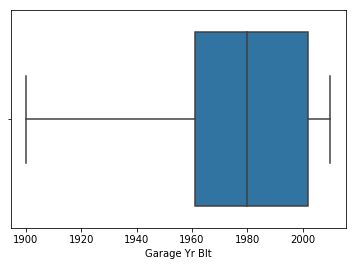

In [19]:
df = df[df["Garage Yr Blt"]>= 1900]
#this entry is too old
sns.boxplot(x=df["Garage Yr Blt"])
#checking to see if there are any more outliers

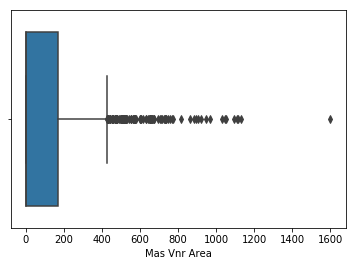

In [20]:
sns.boxplot(x=df["Mas Vnr Area"])

In [21]:
df = df[df["Mas Vnr Area"]<= 1000]
#one wrongly entered value

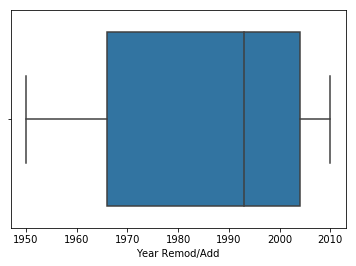

In [22]:
sns.boxplot(x=df["Year Remod/Add"])
#no outliers

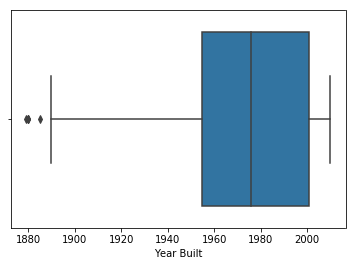

In [23]:
sns.boxplot(x=df["Year Built"])

In [24]:
df = df[df["Year Built"]>= 1890]
#these entries are too old to be considered

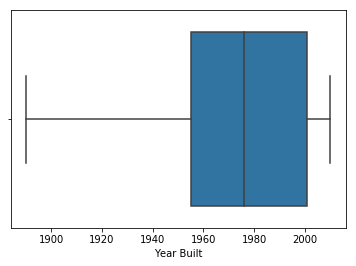

In [25]:
sns.boxplot(x=df["Year Built"])
#no outliers

In [26]:
#Feature Engineering
df["House Age"] = df["Year Remod/Add"] - df["Year Built"]

In [27]:
df.head()
#checking to see if my new feature has been added

,Overall Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Cars,Garage Area,Garage Yr Blt,TotRms AbvGrd,Full Bath,Mas Vnr Area,Year Remod/Add,Year Built,SalePrice,2nd Flr SF,Bsmt Unf SF,MS Zoning,Street,Kitchen Qual,Exter Qual,House Age
0,6,725.0,725,1479,2.0,475.0,1976.0,6,2,289.0,2005,1976,130500,754,192.0,RL,Pave,Gd,Gd,29
1,7,913.0,913,2122,2.0,559.0,1997.0,8,2,132.0,1997,1996,220000,1209,276.0,RL,Pave,Gd,Gd,1
2,5,1057.0,1057,1057,1.0,246.0,1953.0,5,1,0.0,2007,1953,109000,0,326.0,RL,Pave,Gd,TA,54
3,5,384.0,744,1444,2.0,400.0,2007.0,7,2,0.0,2007,2006,174000,700,384.0,RL,Pave,TA,TA,1
4,6,676.0,831,1445,2.0,484.0,1957.0,6,2,0.0,1993,1900,138500,614,676.0,RL,Pave,TA,TA,93


In [28]:
df.isnull().sum()
#checking to see if ther are still any null values left

Overall Qual      0
Total Bsmt SF     1
1st Flr SF        0
Gr Liv Area       0
Garage Cars       0
Garage Area       0
Garage Yr Blt     0
TotRms AbvGrd     0
Full Bath         0
Mas Vnr Area      0
Year Remod/Add    0
Year Built        0
SalePrice         0
2nd Flr SF        0
Bsmt Unf SF       1
MS Zoning         0
Street            0
Kitchen Qual      0
Exter Qual        0
House Age         0
dtype: int64

In [29]:
df.dropna(subset=['Total Bsmt SF'], inplace=True)
#dropping the 1 null value

In [30]:
df.isnull().sum()
#no null values

Overall Qual      0
Total Bsmt SF     0
1st Flr SF        0
Gr Liv Area       0
Garage Cars       0
Garage Area       0
Garage Yr Blt     0
TotRms AbvGrd     0
Full Bath         0
Mas Vnr Area      0
Year Remod/Add    0
Year Built        0
SalePrice         0
2nd Flr SF        0
Bsmt Unf SF       0
MS Zoning         0
Street            0
Kitchen Qual      0
Exter Qual        0
House Age         0
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split


Introducing Interaction columns

In [32]:
df["Interaction_Column1"] = df["Garage Yr Blt"]* df["Garage Yr Blt"]

In [33]:
df["Interaction_column2"] = df["Gr Liv Area"]*df["2nd Flr SF"]

In [34]:
df["Interaction_column3"] = df["Total Bsmt SF"]*df["Bsmt Unf SF"]

Creating the target matrix

In [35]:
Y = df["SalePrice"]

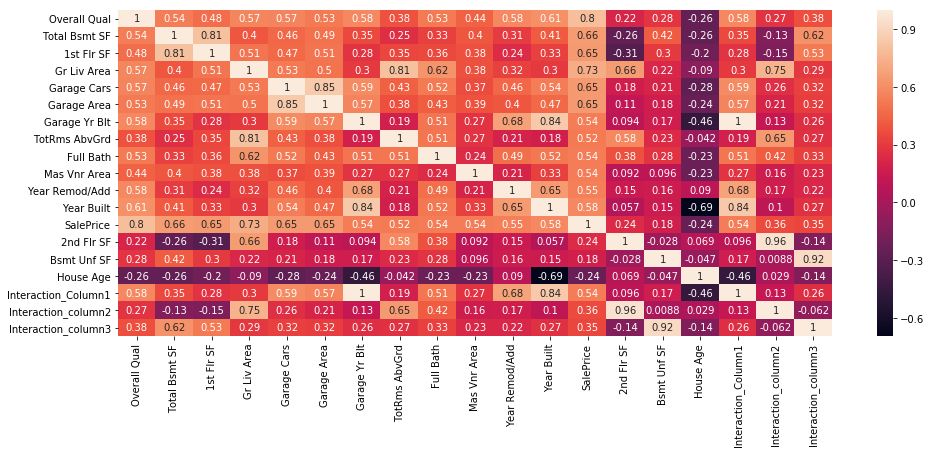

In [36]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(),annot=True)
#high co-relation between all the features

Dropping the target feature from the feature matrix and removing unnecessary features added while creating the interaction columns

In [37]:
df = df.drop(columns=["SalePrice","House Age"])

Choosing non-numerical features using the cramers-V test:

In [38]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [39]:
import scipy.stats as ss
import matplotlib.pyplot as plt
from collections import Counter

In [40]:
cols = train.select_dtypes(include =['object']).columns

In [41]:
for index1, c1 in enumerate(cols):
    print(c1, cramers_v(train[c1],train['SalePrice']))

MS Zoning 0.4910128406275723
Street 0.6554063343889912
Alley 0.3208464869059024
Lot Shape 0.21449465290601197
Land Contour 0.24861413248953101
Utilities 0.3827645252978659
Lot Config 0.0
Land Slope 0.16111602233091457
Neighborhood 0.13112141422344822
Condition 1 0.06407225689036647
Condition 2 0.2951622376103838
Bldg Type 0.0
House Style 0.0
Roof Style 0.0
Roof Matl 0.034605478710593794
Exterior 1st 0.3025483363012138
Exterior 2nd 0.0
Mas Vnr Type 0.2501068469230645
Exter Qual 0.5223539124900954
Exter Cond 0.2538171393762235
Foundation 0.40944753215066143
Bsmt Qual 0.3532376588552363
Bsmt Cond 0.24352376164440281
Bsmt Exposure 0.26690652285123767
BsmtFin Type 1 0.0
BsmtFin Type 2 0.0
Heating 0.0
Heating QC 0.24057279991021044
Central Air 0.349020209273001
Electrical 0.2501239541496037
Kitchen Qual 0.463968965747128
Functional 0.3390825329769578
Fireplace Qu 0.14034309862684485
Garage Type 0.13562132662110854
Garage Finish 0.3548827501892797
Garage Qual 0.4015573147127524
Garage Cond 0.

C:\Users\Shruthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Sale Type 0.26871934055591534


I am going to pick the features that have a co-relation of close to 0.5 with the sale price

and those are:

1. MS ZONING
2. STREET
3. Exterior Quality
4. Kitchen Quality

These features have been added to the dataframe on top

These non-numerical features have to be converted to numerical features by one-hot encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['MS Zoning']=le.fit_transform(df[['MS Zoning']])
df['Street']=le.fit_transform(df[['Street']])
df["Exter Qual"]=le.fit_transform(df[["Exter Qual"]])
df["Kitchen Qual"]=le.fit_transform(df[["Kitchen Qual"]])
df["Kitchen Qual"]=le.fit_transform(df[["Kitchen Qual"]])

C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

In [43]:
df.head()
#all non-numerical features have been converted to numerical features

,Overall Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Cars,Garage Area,Garage Yr Blt,TotRms AbvGrd,Full Bath,Mas Vnr Area,...,Year Built,2nd Flr SF,Bsmt Unf SF,MS Zoning,Street,Kitchen Qual,Exter Qual,Interaction_Column1,Interaction_column2,Interaction_column3
0,6,725.0,725,1479,2.0,475.0,1976.0,6,2,289.0,...,1976,754,192.0,4,1,2,2,3904576.0,1115166,139200.0
1,7,913.0,913,2122,2.0,559.0,1997.0,8,2,132.0,...,1996,1209,276.0,4,1,2,2,3988009.0,2565498,251988.0
2,5,1057.0,1057,1057,1.0,246.0,1953.0,5,1,0.0,...,1953,0,326.0,4,1,2,3,3814209.0,0,344582.0
3,5,384.0,744,1444,2.0,400.0,2007.0,7,2,0.0,...,2006,700,384.0,4,1,3,3,4028049.0,1010800,147456.0
4,6,676.0,831,1445,2.0,484.0,1957.0,6,2,0.0,...,1900,614,676.0,4,1,3,3,3829849.0,887230,456976.0


In [44]:
df.info()
#checking to see if all my data types are integers/floats

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1892 entries, 0 to 2050
Data columns (total 21 columns):
Overall Qual           1892 non-null int64
Total Bsmt SF          1892 non-null float64
1st Flr SF             1892 non-null int64
Gr Liv Area            1892 non-null int64
Garage Cars            1892 non-null float64
Garage Area            1892 non-null float64
Garage Yr Blt          1892 non-null float64
TotRms AbvGrd          1892 non-null int64
Full Bath              1892 non-null int64
Mas Vnr Area           1892 non-null float64
Year Remod/Add         1892 non-null int64
Year Built             1892 non-null int64
2nd Flr SF             1892 non-null int64
Bsmt Unf SF            1892 non-null float64
MS Zoning              1892 non-null int32
Street                 1892 non-null int32
Kitchen Qual           1892 non-null int64
Exter Qual             1892 non-null int32
Interaction_Column1    1892 non-null float64
Interaction_column2    1892 non-null int64
Interaction_column3

# Building the model 

I am first using simple linear regression to test

In [45]:
X_train, X_test, y_train, y_test =train_test_split(df,Y,train_size=0.75,test_size=0.25,random_state=123)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)
print("score:",score)
print("cross val score:",cross_val_score(model,X_train,y_train, cv=7).mean())

score: 0.8667197024366385
cross val score: 0.8756144926745223


Now I am going to standardize and then check the score

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df))
StandardScaler(copy=True, with_mean=True, with_std=True)
standardized_df = scaler.transform(df)

StandardScaler(copy=True, with_mean=True, with_std=True)


C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shruthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


In [47]:
X_train, X_test, y_train, y_test =train_test_split(standardized_df,Y,train_size=0.75,test_size=0.25,random_state=123)
lm = linear_model.LinearRegression()
model2 = lm.fit(X_train,y_train)
predictions = model2.predict(X_test)
score = model2.score(X_test,y_test)
print("score:",score)
print("cross val score:",cross_val_score(model2,X_train,y_train, cv=7).mean())

score: 0.8667197024366341
cross val score: 0.8756144926745251


Standardizing is not imporving the performance

Now I am going to try Ridge Regression

In [48]:
#ridge reg model
from sklearn.linear_model import Ridge,  LinearRegression, RidgeCV
from sklearn.model_selection import cross_val_score

alphas = np.logspace(-5, 5, 200)
clf = RidgeCV(alphas=alphas).fit(X_train,y_train)
clf.predict(X_test)
clf.score(X_test,y_test)

0.8665850425754692

The model has an accuracy of 86.7 % 

In [49]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,predictions))

25763.86663017529

The RMSE of the values are shown above. This is my final submission.

# Now for the Kaggle Submission

In [50]:
test_csv = "C:/Users/Shruthi/Desktop/classes-students/projects1234/project_2/datasets/test.csv"
test = pd.read_csv(test_csv)

In [51]:
test = test[["Overall Qual", "Total Bsmt SF","1st Flr SF","Gr Liv Area", "Garage Cars", "Garage Area", "Garage Yr Blt","TotRms AbvGrd","Full Bath" , "Mas Vnr Area", "Year Remod/Add" ,"Year Built","2nd Flr SF","Bsmt Unf SF","MS Zoning","Street",
"Exter Qual","Kitchen Qual"]]

In [52]:
test['Garage Yr Blt'].fillna(test['Year Built'], inplace=True)
test['Mas Vnr Area'].fillna(0, inplace=True)

In [53]:
le = LabelEncoder()
test['MS Zoning']=le.fit_transform(test[['MS Zoning']])
test['Street']=le.fit_transform(test[['Street']])
test["Exter Qual"]=le.fit_transform(test[["Exter Qual"]])
test["Kitchen Qual"]=le.fit_transform(test[["Kitchen Qual"]])

C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

In [54]:
test["Interaction_Column1"] = test["Garage Yr Blt"]* test["Year Built"]
test["Interaction_column2"] = test["Gr Liv Area"]*test["2nd Flr SF"]
test["Interaction_column3"] = test["Total Bsmt SF"]*test["Bsmt Unf SF"]

In [55]:
final = model.predict(test)
final = pd.DataFrame(final)

In [57]:
boom_csv = "C:/Users/Shruthi/Desktop/classes-students/projects1234/project_2/datasets/test.csv"
boom = pd.read_csv(boom_csv)

In [58]:
final_kaggle = final.join(boom["Id"], how='outer')
final_kaggle = final_kaggle[['Id', 0]]

In [59]:
final_kaggle.to_csv('final_kaggle.csv',index=False)